In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
path = "http://www.iam.fmph.uniba.sk/ospm/Rosa/PDV/01_nhanes-weight.xls"
#path = "01_nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

In [ ]:
Y = data["Gender"]

X = data.copy(deep=True)
X.drop(labels="Gender",axis=1,inplace=True)

# Trenovacia a validacna
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
X_train

Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  Waist
1261  35.083333    76.5     169        38.3        38.1        32.8   94.0
2385  47.250000   171.4     184        37.5        41.5        44.6  155.9
901   31.250000    70.6     159        39.0        36.0        31.0   87.7
3615  61.250000    82.5     167        30.2        35.6        35.6   96.6
3766  62.583333    80.4     166        36.8        39.0        37.7  100.7
...         ...     ...     ...         ...         ...         ...    ...
2403  47.416667   101.1     185        43.6        42.0        36.4  108.3
4827  77.250000    71.5     152        32.0        34.8        32.0  106.2
1861  41.416667    85.6     174        41.0        35.2        36.7  102.6
2052  43.833333   115.8     186        41.1        39.7        39.7  111.1
3862  63.500000    93.6     162        34.5        38.9        35.0  107.9

[3982 rows x 7 columns]

In [ ]:
# Rozhodovaci strom
strom = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
strom.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

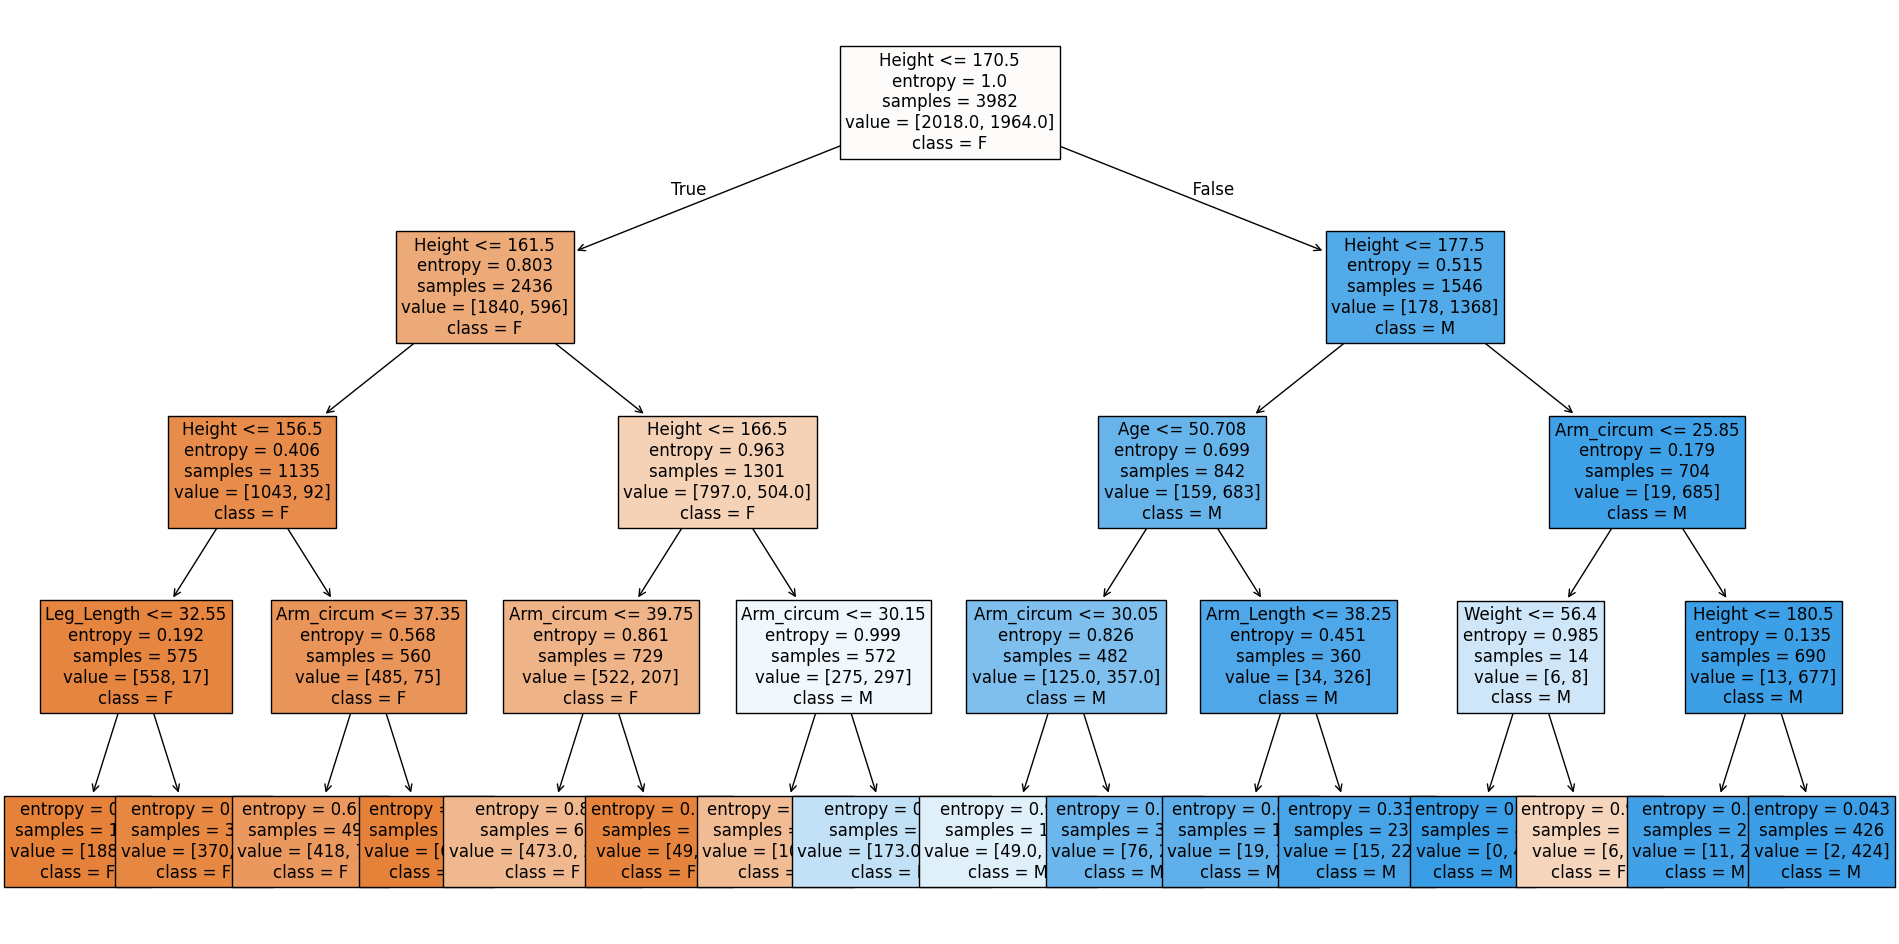

In [ ]:
# Vykreslenie
plt.figure(figsize=(24,12))
tree.plot_tree(strom, feature_names=X.columns, filled=True, class_names=['F', 'M'], fontsize=12)
plt.show()

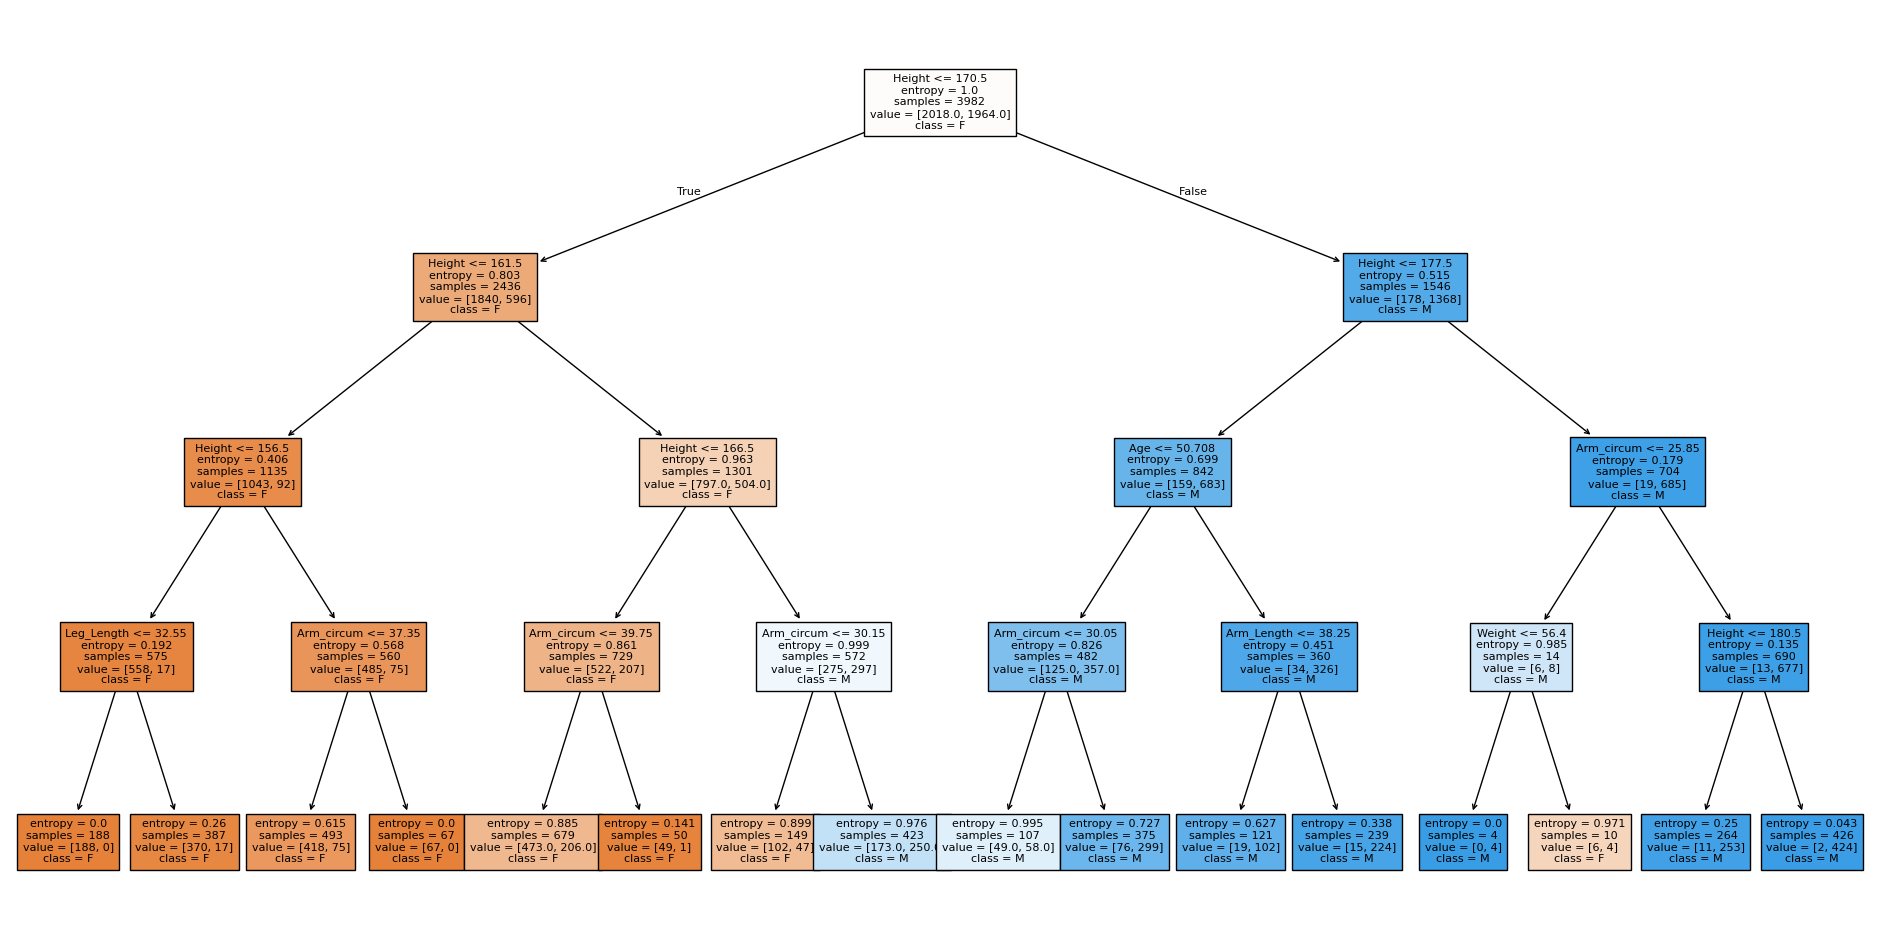

In [ ]:
# Zoom out
plt.figure(figsize=(24,12))
tree.plot_tree(strom, feature_names=X.columns, filled=True, class_names=['F', 'M'], fontsize=8)
plt.show()

accuracy: 0.8142570281124498


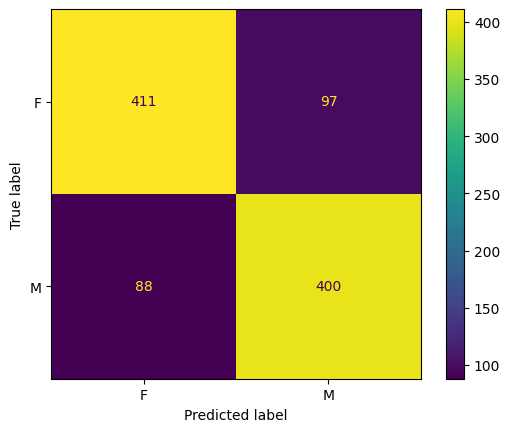

In [ ]:
# Kvalita predikcie
y_pred = strom.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
conf_matrix = confusion_matrix(y_val, y_pred)

print("accuracy:", accuracy)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["F", "M"])
cm_display.plot()

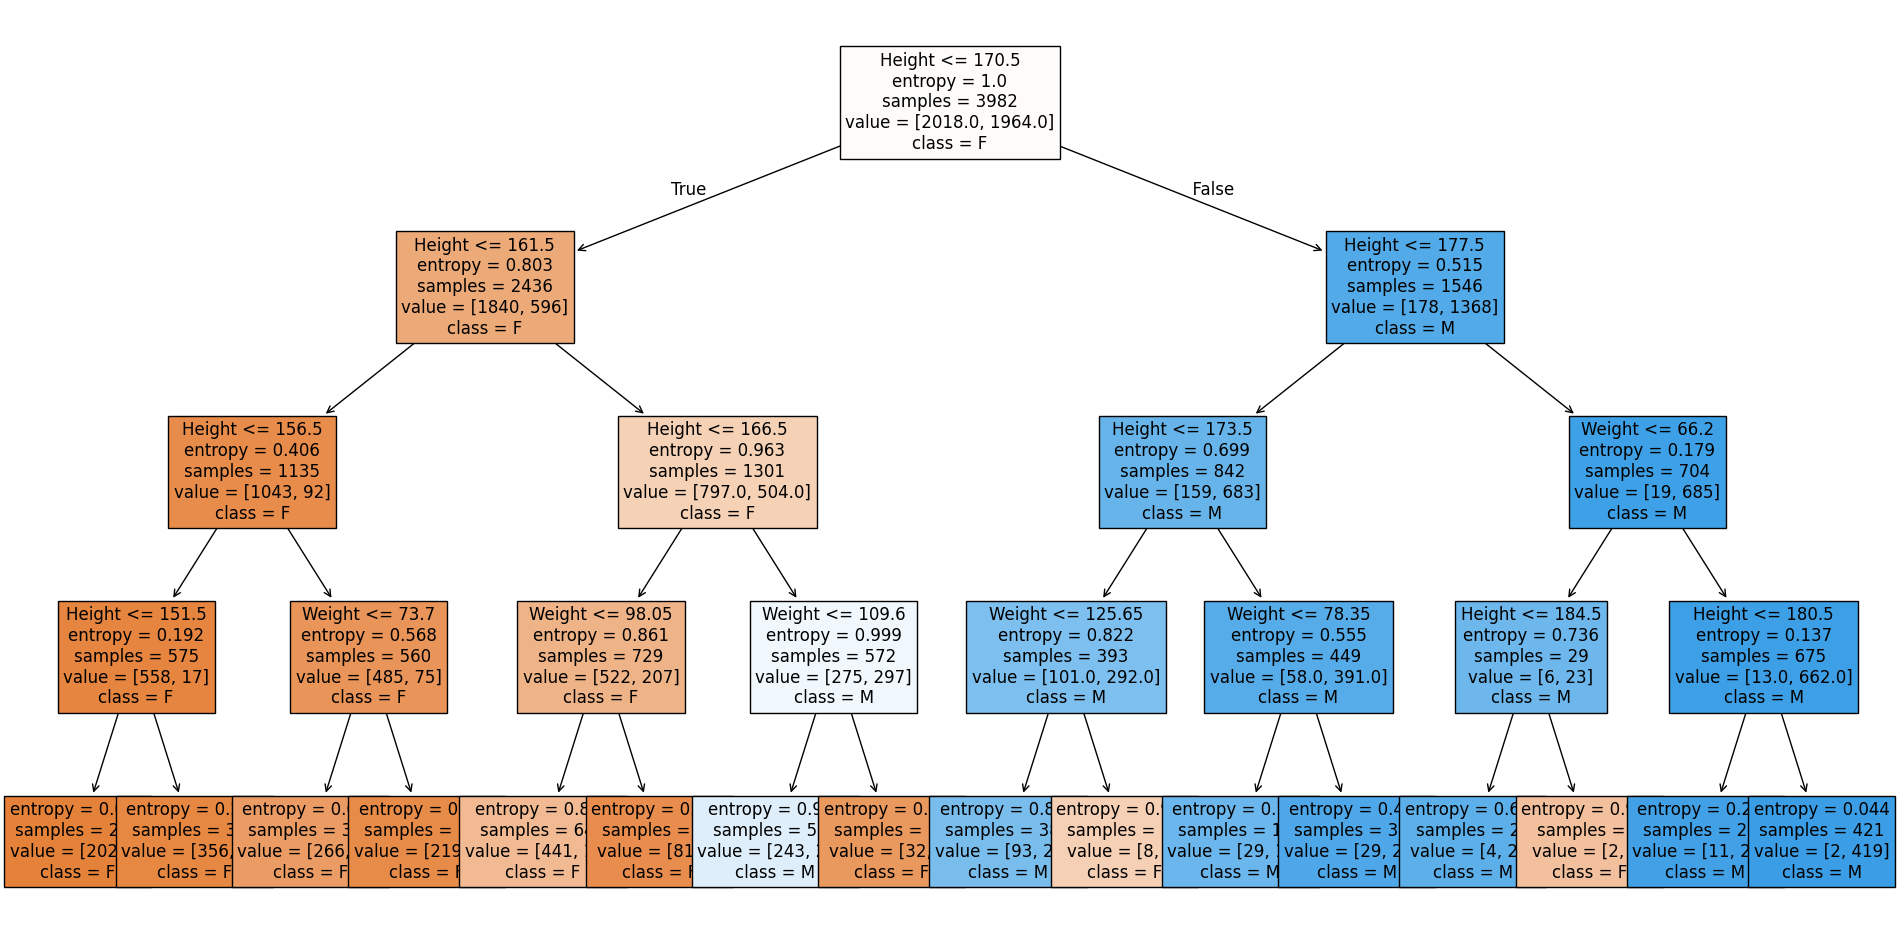

In [ ]:
# Strom pre Weight, Height
X2_train = X_train[["Weight", "Height"]]
strom2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
strom2.fit(X2_train, y_train)

# Vykreslenie
plt.figure(figsize=(24,12))
tree.plot_tree(strom2, feature_names=X2_train.columns, filled=True, class_names=['F', 'M'], fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Height')

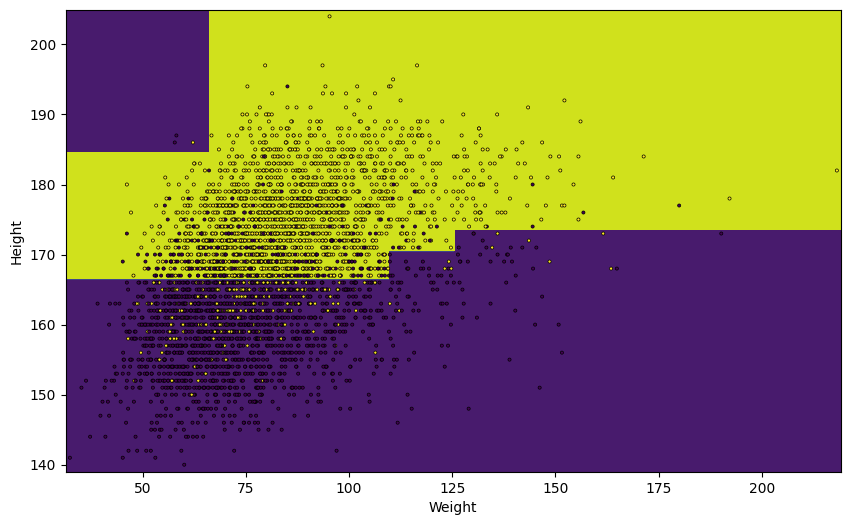

In [ ]:
# Rozhodovacia hranica pre 2D prediktory
x_min, x_max = X_train["Weight"].min() - 1, X_train["Weight"].max() + 1
y_min, y_max = X_train["Height"].min() - 1, X_train["Height"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = strom2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train["Weight"], X_train["Height"], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')
# vertikalne a horizontalne! (nevyhnutne musia take byt)

In [ ]:
# Dobrovolna DU:
# - vyskusajte sa (idealne systematicky) vyhrat s nastaveniami stromu, aby co najlepsie predikoval
# - vyskusajte aj Sady stromov (Random forests atd.), porovnajte ziskane decision boundaries (a kvality predikcie)